4422102/4422102 [==============================] - 0s 0us/step


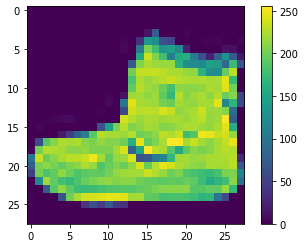

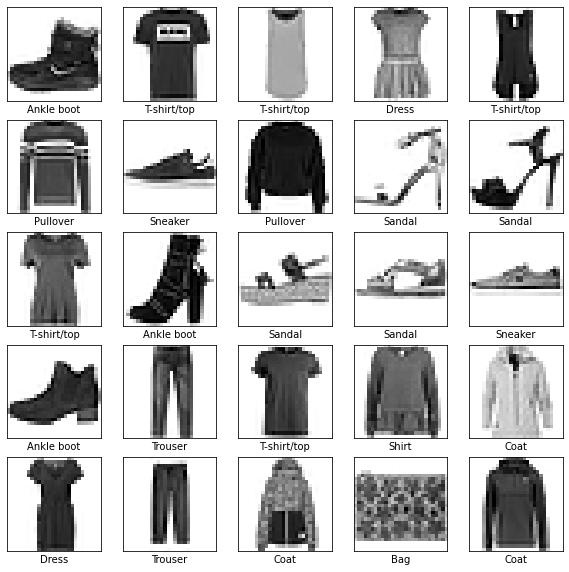

Epoch 1/10
1875/1875 [==============================] - 18s 8ms/step - loss: 0.5014 - accuracy: 0.8229
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3812 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3390 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3140 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2967 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2804 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2673 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2571 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2463 - accuracy: 0.9078
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3418

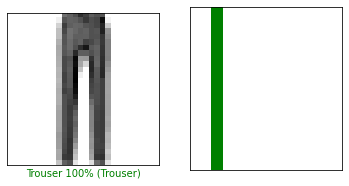

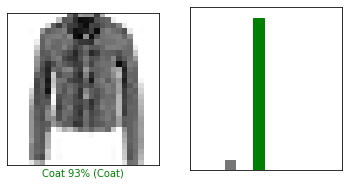

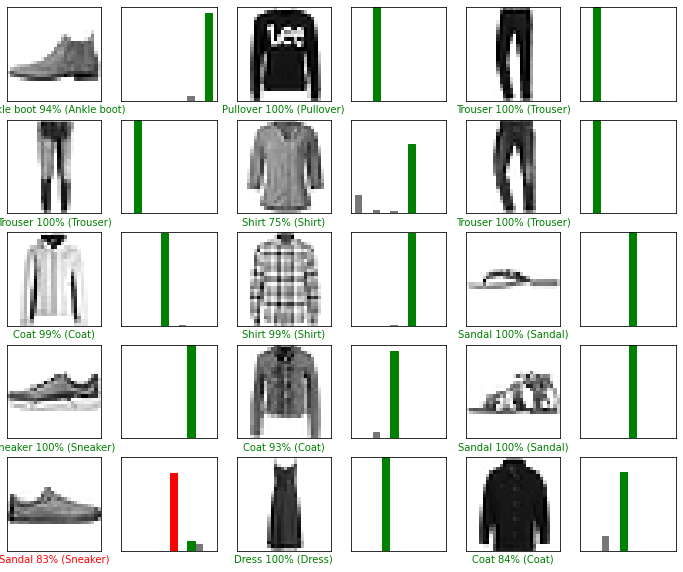

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 25ms/step
[[2.7453123e-10 1.9771809e-11 2.4234412e-10 4.6135356e-11 1.6035201e-11
  2.8062486e-03 7.1798588e-08 5.7231534e-02 2.4393025e-09 9.3996221e-01]]


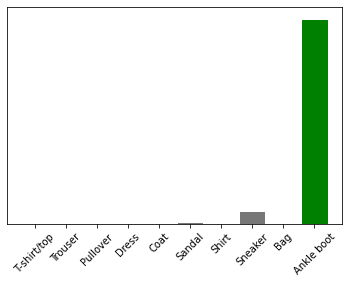

In [ ]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape

train_labels
test_images.shape

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

predictions = model.predict(test_images)
predictions[0]

np.argmax(predictions[0])


def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

  i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

img = test_images[0]
print(img.shape)

img = (np.expand_dims(img,0))
print(img.shape)
predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

prediction_result = np.argmax(predictions_single[0])




